# **5MIN OMNI & Dayside OCB Model**

**Author:** Arnav Singh 
**Date:** 2024-09-10

---

## **Abstract**

For this notebook, the 5MIN merged OMNI dataset will be used to create different models attempting to model the OCB locations with various inputs and models. 

## **Keywords**

- Keyword 1
- Keyword 2
- Keyword 3

---

## **Table of Contents**

1. [Introduction](#introduction)
2. [Data Description](#data-description)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Model Selection](#model-selection)
7. [Model Training](#model-training)
8. [Model Evaluation](#model-evaluation)
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Results and Discussion](#results-and-discussion)
11. [Conclusion](#conclusion)
12. [References](#references)
13. [Appendix](#appendix)

---

## **Introduction**

Introduce the problem statement, background information, and the significance of the modeling project.

---

In [17]:
### Imports ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dayside_df = pd.read_parquet('data/Dayside.parquet')
dayside_df.describe()

,OCB_Date,OCB_mlat,OCB_mlt,EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ,TIMESHIFT_seconds,MAG_AVG_B-VECTOR_nT,BX__GSE_nT,BY__GSM_nT,BZ__GSM_nT,FLOW_SPEED__GSE_km/s,...,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,5-M_AE_nT,5-M_AL-INDEX_nT,SYM/H_INDEX_nT,5-M_PC(N)-INDEX_,BT,qc,sin_term,dFMP_dt
count,437644,437644.000000,437644.000000,437644,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,...,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,437644.000000,213160.000000,213160.000000
mean,2003-06-01 14:36:20.500443008,6.040775,11.697393,2003-06-01 14:36:19.860800,2362.558701,5.907477,0.075834,-0.070200,-0.354826,436.225657,...,6.473615,2.223449,212.995867,-137.709360,-13.172677,1.177026,4.429847,-0.058896,0.461304,4097.295290
min,1983-12-05 00:47:40,-89.760000,0.110000,1983-12-05 00:50:00,-10189.000000,0.260000,-40.990000,-42.590000,-54.400000,234.400000,...,0.030000,0.010000,1.000000,-3032.000000,-475.000000,-11.790000,0.010000,-3.141593,0.000000,0.000000
25%,1999-02-11 06:19:51.750000,-77.820000,7.850000,1999-02-11 06:21:15,681.000000,3.920000,-2.600000,-2.710000,-2.150000,356.100000,...,3.190000,1.240000,51.000000,-195.000000,-20.000000,0.240000,2.455952,-1.720544,0.147689,1002.849111
50%,2004-04-11 13:21:29,72.470000,10.510000,2004-04-11 13:20:00,2618.000000,5.250000,0.110000,-0.150000,-0.290000,412.000000,...,4.970000,1.790000,127.000000,-72.000000,-10.000000,0.860000,3.813325,-0.146484,0.437412,2980.533893
75%,2008-01-29 00:29:56.500000,78.180000,16.470000,2008-01-29 00:30:00,3549.000000,7.060000,2.730000,2.560000,1.520000,496.400000,...,7.920000,2.650000,303.000000,-24.000000,-2.000000,1.840000,5.611355,1.615992,0.763063,5848.386906
max,2012-12-31 23:22:24,89.900000,23.970000,2012-12-31 23:20:00,10655.000000,59.690000,35.230000,47.740000,41.270000,1094.500000,...,70.800000,89.510000,2945.000000,38.000000,109.000000,24.110000,57.881329,3.141593,1.000000,111132.480707
std,NaN,77.666829,4.706631,NaN,1737.990144,3.111417,3.681877,4.132693,3.377761,105.762569,...,5.245134,1.739334,225.276487,166.579801,19.631408,1.417505,2.999276,1.830629,0.331910,4317.031442


In [19]:
daysideN_df = dayside_df[dayside_df['OCB_mlat'] > 0]
daysideS_df = dayside_df[dayside_df['OCB_mlat'] < 0]

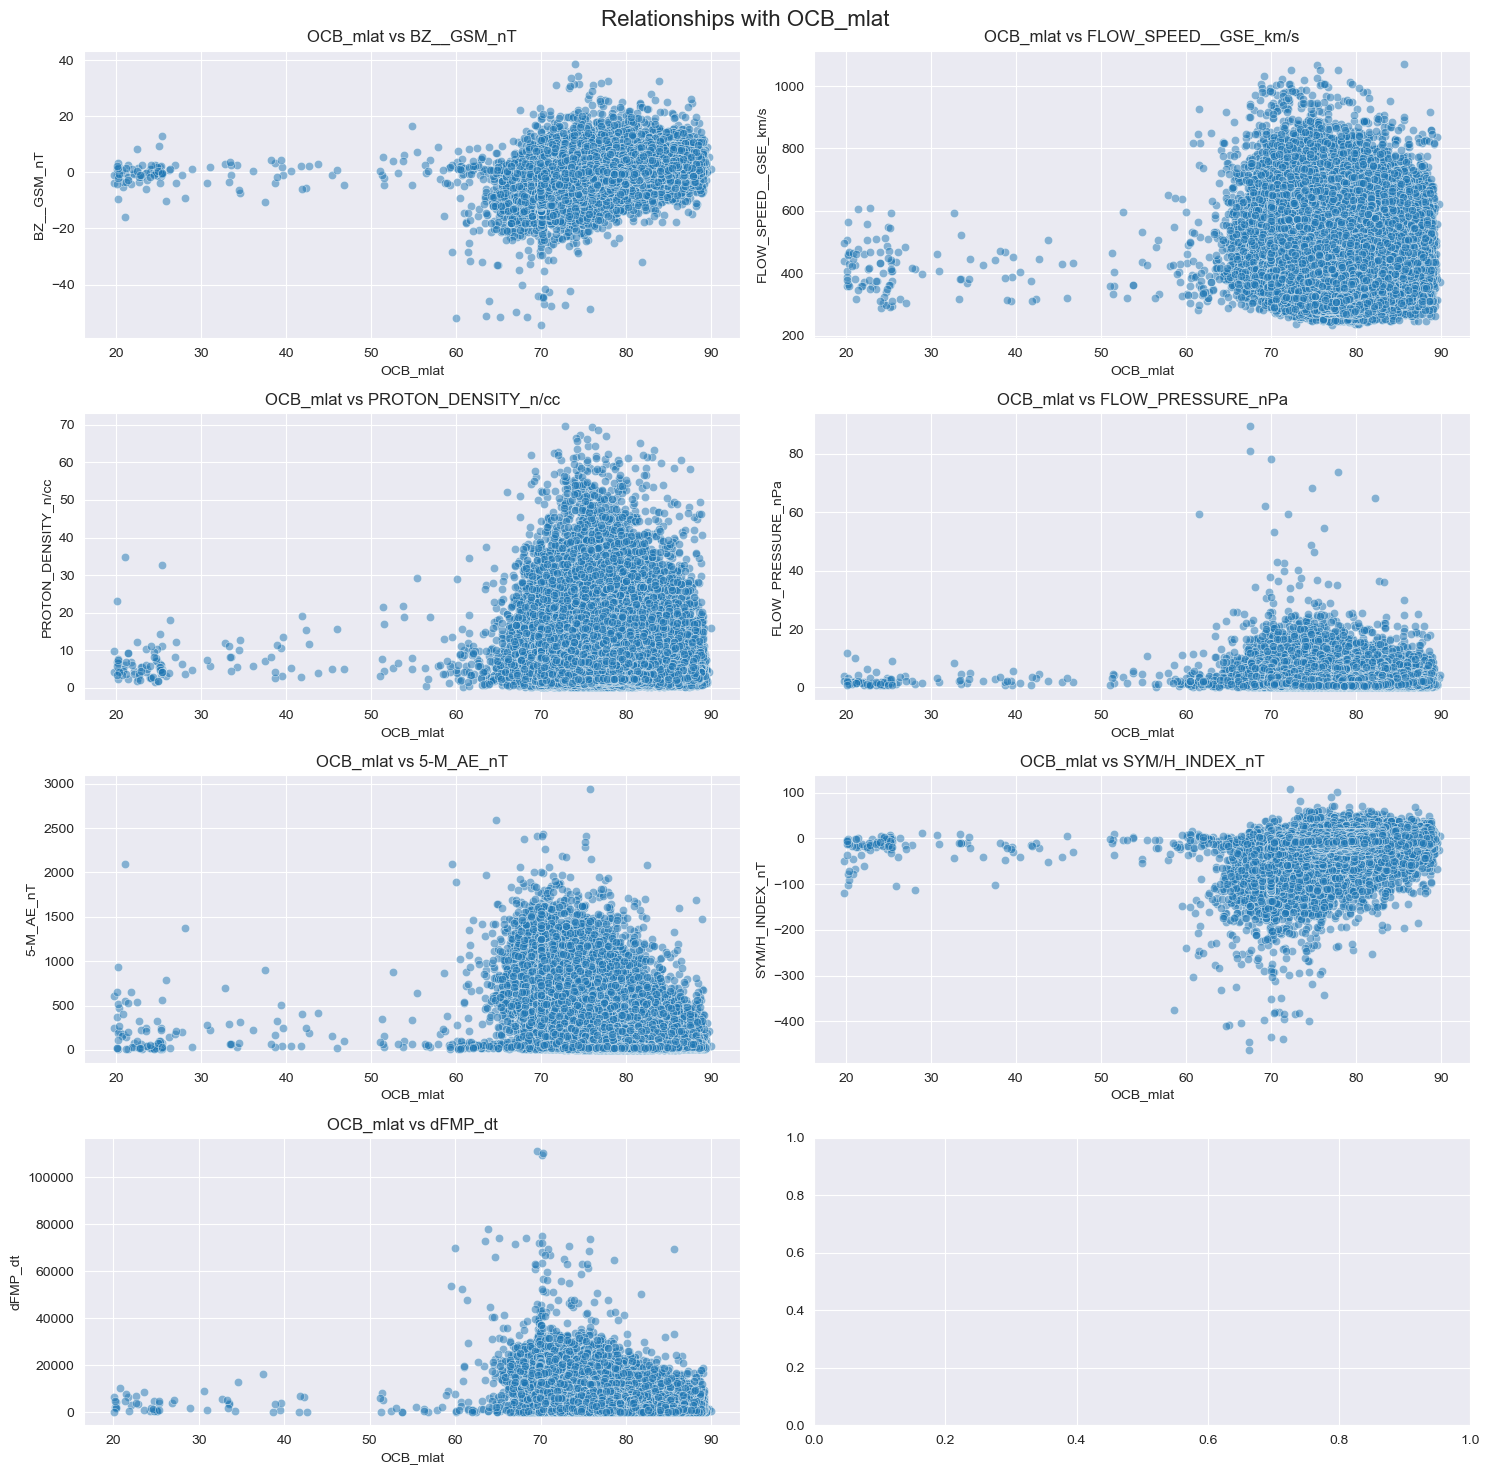

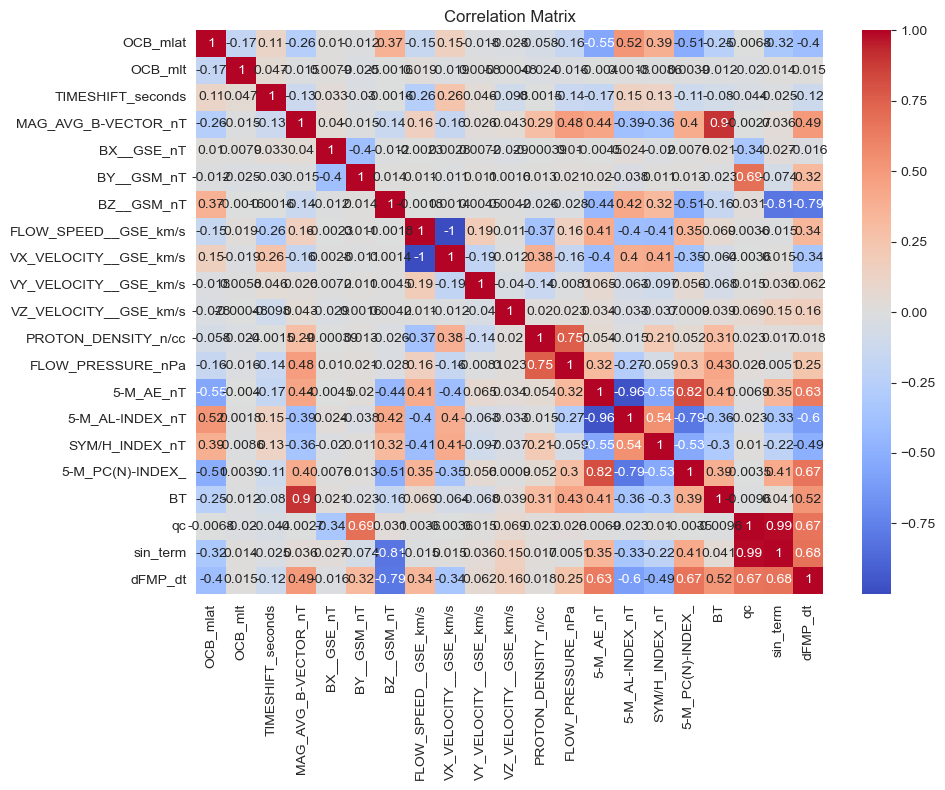

In [23]:
def plot_df(df): 
    # Create subplots for each comparison
    fig, axes = plt.subplots(4, 2, figsize=(15, 15))
    fig.suptitle('Relationships with OCB_mlat', fontsize=16)
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # List of columns to compare with OCB_mlat (excluding date/time columns)
    columns_to_plot = ['BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s', 'PROTON_DENSITY_n/cc', 
                       'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'SYM/H_INDEX_nT' , 'dFMP_dt']
    
    # Create scatter plots
    for i, col in enumerate(columns_to_plot):
        sns.scatterplot(data=df, x='OCB_mlat', y=col, ax=axes[i], alpha=0.5)
        axes[i].set_title(f'OCB_mlat vs {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Create correlation plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
                annot=True, 
                cmap='coolwarm',
                center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

plot_df(daysideN_df)

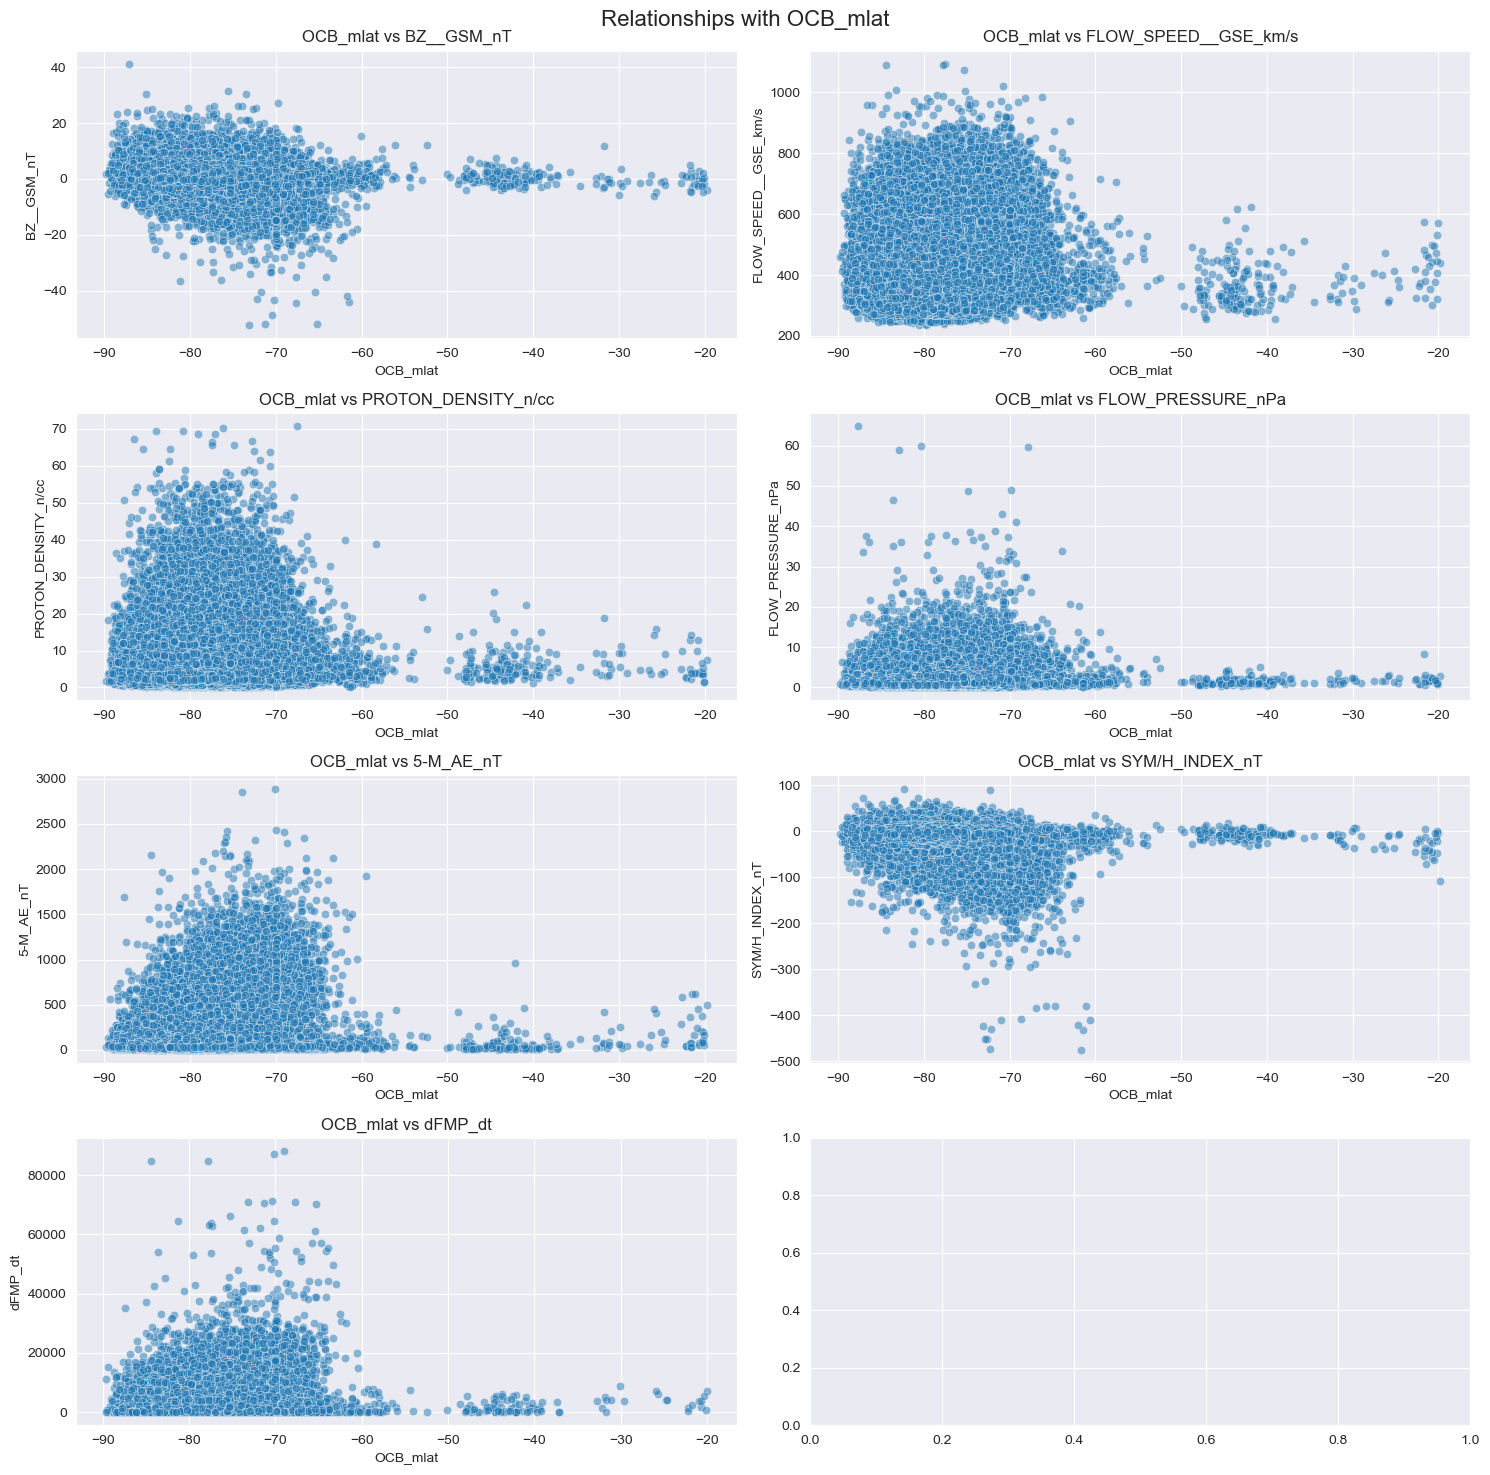

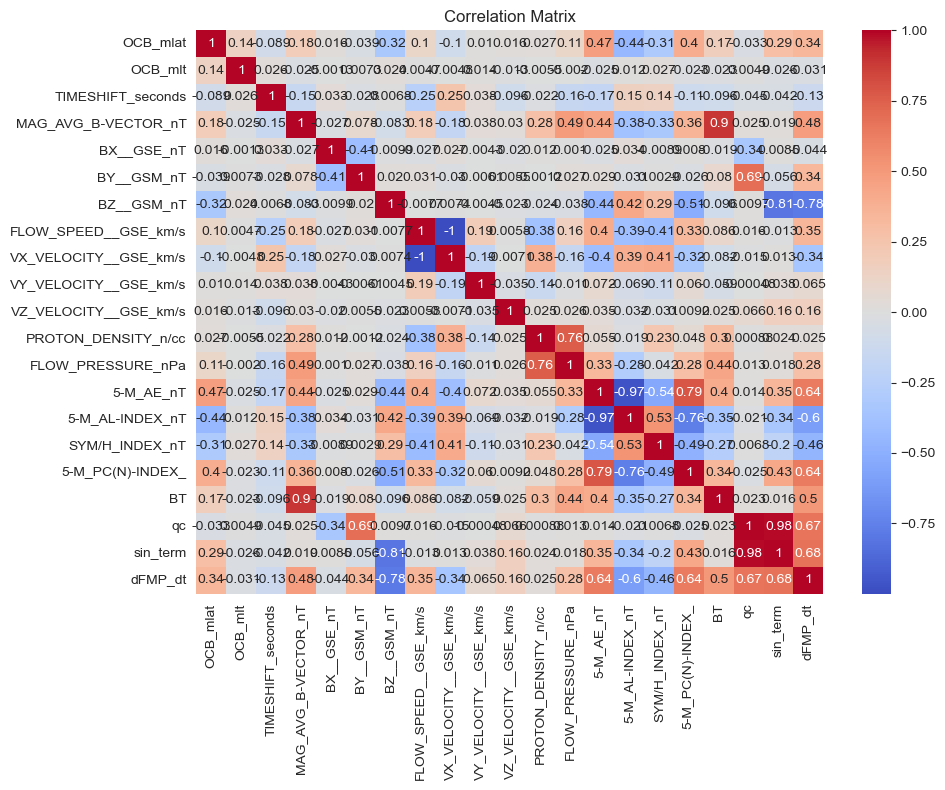

In [24]:
plot_df(daysideS_df)

Epoch 1/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.1596 - loss: 2.7135 - val_accuracy: 0.1735 - val_loss: 2.4460
Epoch 2/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1771 - loss: 2.4254 - val_accuracy: 0.1816 - val_loss: 2.3980
Epoch 3/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1772 - loss: 2.3963 - val_accuracy: 0.1821 - val_loss: 2.3758
Epoch 4/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.1868 - loss: 2.3819 - val_accuracy: 0.1855 - val_loss: 2.3619
Epoch 5/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1841 - loss: 2.3659 - val_accuracy: 0.1830 - val_loss: 2.3605
Epoch 6/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1871 - loss: 2.3586 - val_accuracy: 0.1859 - val_loss: 2.3628
Epoch 7/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1855 - loss: 2.3577 - val_accuracy: 0.1877 - val_loss: 2.3517
Epoch 8/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1890 - loss: 2.3557 - 

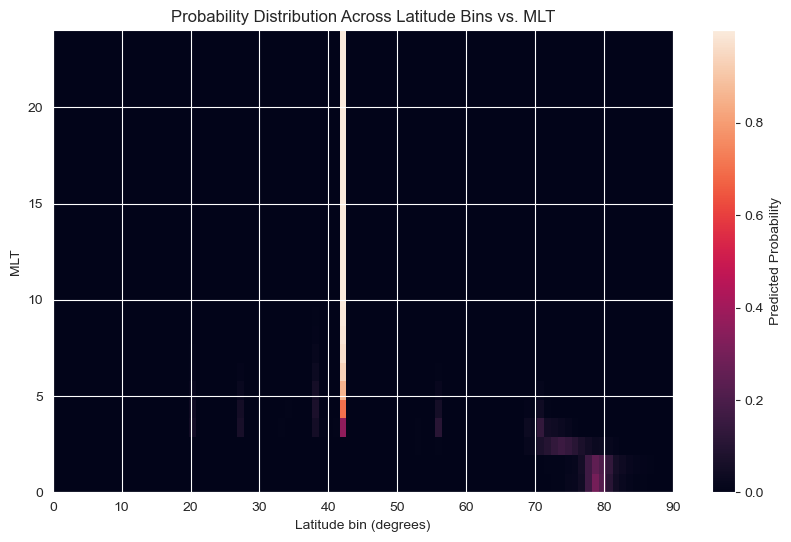

Epoch 1/100


2024-12-23 23:06:53.903459: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of -1 which is outside the valid range of [0, 91).  Label values: -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
2024-12-23 23:06:53.903494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of -1 which is outside the valid range of [0, 91).  Label values: -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/beastxgamer/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/beastxgamer/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/beastxgamer/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/gg/qxtxkv2501v1x8qx_r4vgk_m0000gn/T/ipykernel_58541/2475254510.py", line 124, in <module>

  File "/var/folders/gg/qxtxkv2501v1x8qx_r4vgk_m0000gn/T/ipykernel_58541/2475254510.py", line 67, in model_NN

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 27, in call

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 1853, in sparse_categorical_crossentropy

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of -1 which is outside the valid range of [0, 91).  Label values: -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_160498]

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import keras_tuner as kt

features = [
    'OCB_mlt','MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s', 'PROTON_DENSITY_n/cc', 
    'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
]

target = 'OCB_mlat'  # single latitude per MLT
def model_NN(df):
    df = df.dropna(subset=features + [target])
    
    X = df[features].values
    Y = df[[target]].values  # shape (N, 1)
    
    # Train-validation-test split
    X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.25, random_state=42)
    
    # Scale inputs
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    # 181 evenly spaced integer latitudes from -90 to +90
    lat_bins = np.arange(0, 91, 1)  # shape=(181,)
    N_BINS = len(lat_bins)  # 181
    
    # Suppose Y_train is shape (N,) with lat in range [-90, 90]
    # We'll find the bin each lat belongs to via np.digitize
    Y_train_bin = np.digitize(Y_train, lat_bins) - 1  
    #   -1 so that bins start at index 0. 
    #   This yields integer indexes in [0..180].
    
    # We do the same for Y_val and Y_test
    Y_val_bin = np.digitize(Y_val, lat_bins) - 1
    Y_test_bin = np.digitize(Y_test, lat_bins) - 1
    
    from tensorflow.keras.utils import to_categorical
    
    #  Option A: "sparse" labels
    #  Just use Y_train_bin as is (integer class labels).
    #  Then compile with loss='sparse_categorical_crossentropy'.
    
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.2),
        layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.2),
        layers.Dense(N_BINS, activation='softmax')  # 181-class output
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # use sparse labels
                  metrics=['accuracy'])
    
    # Final training with early stopping to prevent overfitting
    es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, Y_train_bin,
                        validation_data=(X_val, Y_val_bin),
                        epochs=100, batch_size=128,
                        callbacks=[es],
                        verbose=1)
    
    proba = model.predict(X_test)  # shape (N_test, 181)
    # If you want the “most likely” latitude:
    predicted_bin = np.argmax(proba, axis=1)  # integer in [0..180]
    predicted_lat = lat_bins[predicted_bin]   # map bin index back to actual lat
    example_input_features = X_test[0:1]  # one sample
    # This corresponds to some MLT in example_input_features[-1], but we can vary MLT now.
    
    # Extract everything except the last feature (b6_mlt) if it is last in your feature list
    # If 'b6_mlt' is the last feature in the feature list, do:
    base_features = example_input_features.copy()
    
    # Let's say the last column of features is MLT:
    feature_idx_mlt = features.index('OCB_mlt')
    
    MLT_values = np.arange(25)
    prob_distributions = []
    
    for mlt in MLT_values:
        # Make a copy of your features
        temp_input = base_features.copy()
        # Set the MLT column to this mlt
        temp_input[0, feature_idx_mlt] = mlt
        
        # Predict probabilities for this single input
        proba = model.predict(temp_input)  # shape = (1, 181)
        
        # proba is 2D; extract the 1D probability array
        prob_distributions.append(proba[0])
    
    # Convert to a 2D array: shape = (25, 181)
    #   row = MLT, col = latitude bin
    prob_distributions = np.array(prob_distributions)
    
    
    plt.figure(figsize=(10, 6))
    
    # imshow expects (top->bottom, left->right), so we set extent properly
    #   extent = (x_min, x_max, y_min, y_max)
    #   Here x is lat_bins from -90..90, y is MLT from 0..24
    plt.imshow(prob_distributions, 
               origin='lower',               # so that row 0 is at the bottom
               aspect='auto', 
               extent=(lat_bins[0], lat_bins[-1], MLT_values[0], MLT_values[-1]))
    
    plt.colorbar(label="Predicted Probability")
    plt.xlabel("Latitude bin (degrees)")
    plt.ylabel("MLT")
    plt.title("Probability Distribution Across Latitude Bins vs. MLT")
    plt.show()

model_NN(daysideN_df)
model_NN(daysideS_df)

Reloading Tuner from ocb_tuning/ocb_north/tuner0.json
Epoch 1/100


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1922 - loss: 2.3302 - val_accuracy: 0.1903 - val_loss: 2.3348
Epoch 2/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1935 - loss: 2.3352 - val_accuracy: 0.1891 - val_loss: 2.3373
Epoch 3/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1899 - loss: 2.3349 - val_accuracy: 0.1923 - val_loss: 2.3374
Epoch 4/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1940 - loss: 2.3419 - val_accuracy: 0.1900 - val_loss: 2.3377
Epoch 5/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1935 - loss: 2.3281 - val_accuracy: 0.1906 - val_loss: 2.3344
Epoch 6/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1960 - loss: 2.3267 - val_accuracy: 0.1927 - val_loss: 2.3361
Epoch 7/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.1978 - loss: 2.3285 - val_accuracy: 0.1917 - val_loss: 2.3357
Epoch 8/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1937 - loss: 2.3287 - val_accuracy: 0.19

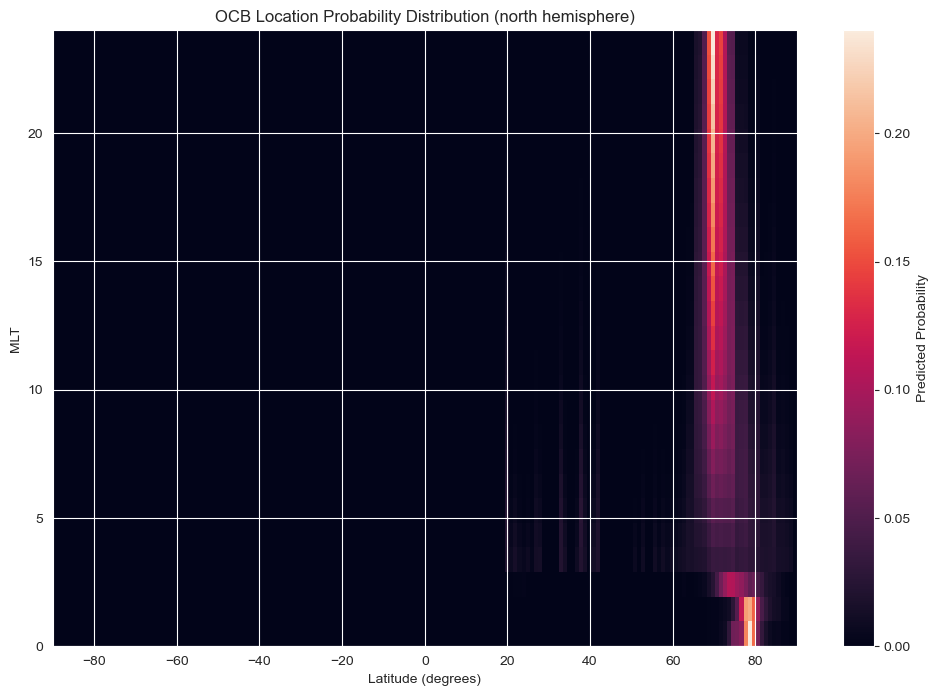

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt

def build_model(hp):
    """Hyperparameter-tunable model builder"""
    model = models.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(8,)))  # 8 features
    
    # Tune number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune number of units
        units = hp.Int(f'units_{i}', min_value=64, max_value=1024, step=64)
        
        model.add(layers.Dense(
            units=units,
            activation='relu',
            kernel_regularizer=regularizers.l2(
                hp.Float(f'l2_{i}', 1e-6, 1e-3, sampling='log')
            )
        ))
        
        # Tune dropout rate
        model.add(layers.Dropout(
            hp.Float(f'dropout_{i}', 0, 0.5, step=0.1)
        ))
    
    # Output layer (N_BINS classes)
    model.add(layers.Dense(181, activation='softmax'))
    
    # Tune learning rate
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def process_latitudes(lats):
    """Process latitude values to handle both hemispheres"""
    # Create bins from -90 to +90
    lat_bins = np.arange(-90, 91, 1)  # 181 bins
    
    # Digitize the latitudes into bins
    # Add 90 to shift from [-90,90] to [0,180] range
    lat_indices = np.digitize(lats, lat_bins) - 1
    
    return lat_bins, lat_indices

def model_NN(df, hemisphere='north'):
    """
    Train neural network model with hyperparameter tuning
    
    Parameters:
    df: DataFrame containing the data
    hemisphere: 'north' or 'south' to indicate which hemisphere's data
    """
    features = [
        'OCB_mlt', 'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s',
        'PROTON_DENSITY_n/cc', 'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
    ]
    target = 'OCB_mlat'
    
    # Clean data
    df = df.dropna(subset=features + [target])
    
    X = df[features].values
    Y = df[[target]].values
    
    # Split data
    X_trainval, X_test, Y_trainval, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )
    X_train, X_val, Y_train, Y_val = train_test_split(
        X_trainval, Y_trainval, test_size=0.25, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    # Process latitudes for both hemispheres
    lat_bins, Y_train_bin = process_latitudes(Y_train)
    _, Y_val_bin = process_latitudes(Y_val)
    _, Y_test_bin = process_latitudes(Y_test)
    
    # Initialize Keras Tuner
    tuner = kt.Hyperband(
        build_model,
        objective='val_accuracy',
        max_epochs=100,
        factor=3,
        directory='ocb_tuning',
        project_name=f'ocb_{hemisphere}'
    )
    
    # Callbacks
    stop_early = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Find best hyperparameters
    tuner.search(
        X_train, Y_train_bin,
        validation_data=(X_val, Y_val_bin),
        callbacks=[stop_early],
        epochs=100,
        batch_size=128
    )
    
    # Get best model
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Final training with best model
    history = best_model.fit(
        X_train, Y_train_bin,
        validation_data=(X_val, Y_val_bin),
        epochs=100,
        batch_size=128,
        callbacks=[stop_early],
        verbose=1
    )
    
    # Evaluate and visualize predictions
    def plot_predictions(model, feature_idx_mlt=0):
        MLT_values = np.arange(25)
        example_input = X_test[0:1].copy()
        prob_distributions = []
        
        for mlt in MLT_values:
            temp_input = example_input.copy()
            temp_input[0, feature_idx_mlt] = mlt
            proba = model.predict(temp_input, verbose=0)
            prob_distributions.append(proba[0])
        
        prob_distributions = np.array(prob_distributions)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(
            prob_distributions,
            origin='lower',
            aspect='auto',
            extent=(lat_bins[0], lat_bins[-1], MLT_values[0], MLT_values[-1])
        )
        plt.colorbar(label="Predicted Probability")
        plt.xlabel("Latitude (degrees)")
        plt.ylabel("MLT")
        plt.title(f"OCB Location Probability Distribution ({hemisphere} hemisphere)")
        plt.show()
        
        return prob_distributions
    
    predictions = plot_predictions(best_model)
    
    return best_model, history, predictions, scaler

# Usage
north_model, north_history, north_pred, north_scaler = model_NN(daysideN_df, 'north')

Reloading Tuner from ocb_tuning/ocb_south/tuner0.json
Epoch 1/100


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1923 - loss: 2.2635 - val_accuracy: 0.1871 - val_loss: 2.2947
Epoch 2/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1926 - loss: 2.2711 - val_accuracy: 0.1849 - val_loss: 2.2954
Epoch 3/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1990 - loss: 2.2679 - val_accuracy: 0.1864 - val_loss: 2.2961
Epoch 4/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1937 - loss: 2.2649 - val_accuracy: 0.1831 - val_loss: 2.2998
Epoch 5/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1928 - loss: 2.2623 - val_accuracy: 0.1853 - val_loss: 2.2952
Epoch 6/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1914 - loss: 2.2627 - val_accuracy: 0.1861 - val_loss: 2.2956
Epoch 7/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1926 - loss: 2.2625 - val_accuracy: 0.1848 - val_loss: 2.2951
Epoch 8/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1978 - loss: 2.2585 - val_accuracy: 0.1856

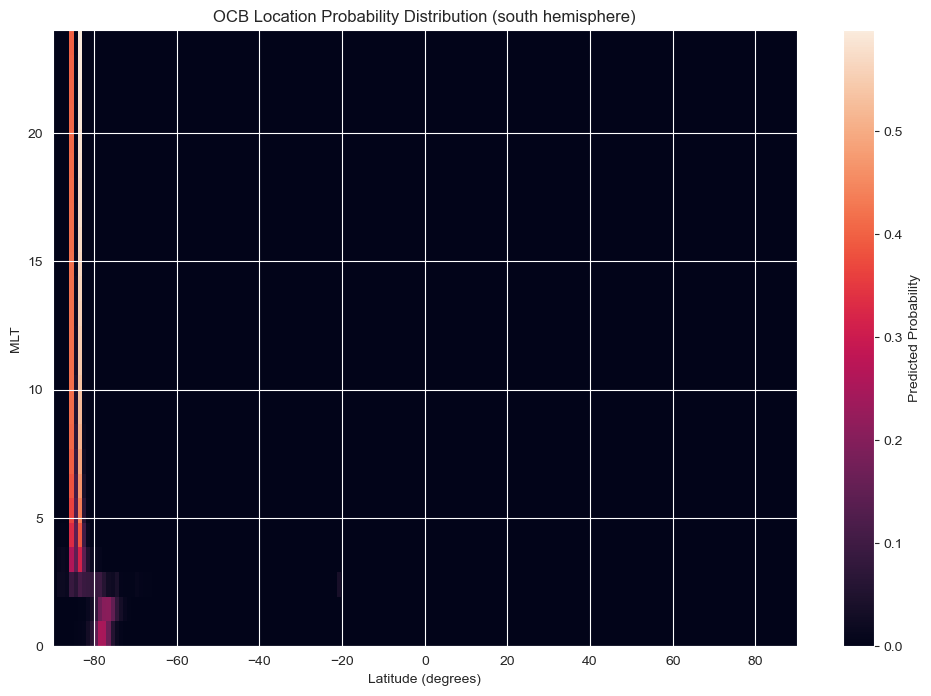

In [30]:
south_model, south_history, south_pred, south_scaler = model_NN(daysideS_df, 'south')